In [ ]:
#正規化したSDFをmolで読み込み、再度SDF化しpandasで読み込み

In [1]:
## 1. ライブラリのインポート
from rdkit import rdBase, Chem
from rdkit.Chem import AllChem, Draw, PandasTools, Descriptors
 
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
print(rdBase.rdkitVersion) # 2019.03.2

2019.03.2


In [2]:
import os
import os.path
import sys

#自作モジュールディレクトリをパスに追加
p_mod=os.path.join(os.environ['HOME'],'notebooks/99MyModules')
sys.path.append(p_mod)

import descarray as da

#データディレクトリ
DataDir=os.path.join(os.environ['HOME'],'notebooks/50Data/')

In [3]:
#正規化SDFをロード
TarDir=DataDir+'SDF_R/'
L_FP=[]
for f in os.listdir(TarDir):
    D_sdf={}
    if f.endswith('.sdf'):
        D_sdf['FN']=f
        D_sdf['RP']=os.path.join(TarDir,f)
        L_FP.append(D_sdf)
len(L_FP)

999

In [6]:
#sdfをmolオブジェクトに
L_sdf=[]
L_mol=[]
for D_sdf in L_FP:
    with open(D_sdf['RP'],'rb') as f:
        suppl=Chem.ForwardSDMolSupplier(f,removeHs=False)
        for el in suppl:
            if el is not None:
                L_mol.append(el)
len(L_mol)

928

In [10]:
#molオブジェクトをまとめてsdfに
WriFP=DataDir+'PCCDB.sdf'
writer = Chem.SDWriter(WriFP)
for el in L_mol:
    writer.write(el)
writer.close()

サイズ:(928, 24)


,HBA,HBD,ID,ROMol,TPSA,cid,dipole,excitation_energy_1,excitation_energy_2,excitation_energy_3,...,lowdin_charges,lumo_energy,melting_point,molecular_refractivity,mulliken_charges,open_babel_can_smiles,oscillator_strength_1,oscillator_strength_2,oscillator_strength_3,oscillator_strength_4
0,4,3,PCCDB-ID: 3,,77.76,3,4.4,3.854,4.276,4.356,...,19\n1 -0.177586\n2 -0.130328\n3 -0.157261\n4 -0.072111\n5 -0.018634\n6 -0.014572\n7 0.195218\n8 -0.447473\n9 -0.449084\n10 -0.368315\n11 -0.262187\n12 0.166273\n13 0.176094\n14 0.167126\n15 0.164229\n16 0.176665\n17 0.345174\n18 0.344452\n19 0.362319,-2.201,132.75,36.8,19\n1 -0.126843\n2 -0.167698\n3 -0.149307\n4 0.029338\n5 0.071841\n6 0.047905\n7 0.551868\n8 -0.609223\n9 -0.610471\n10 -0.58771\n11 -0.464566\n12 0.145904\n13 0.172716\n14 0.1539\n15 0.163632\n16 0.18275\n17 0.393281\n18 0.390155\n19 0.41253,O[C@H]1C=CC=C([C@@H]1O)C(=O)O,0.0299,0.0188,0.193,0.0162
1,2,2,PCCDB-ID: 4,,46.25,4,2.47,5.596,6.262,6.46,...,14\n1 -0.461103\n2 -0.221347\n3 -0.003749\n4 -0.562056\n5 -0.466274\n6 0.157431\n7 0.143024\n8 0.159247\n9 0.108165\n10 0.145349\n11 0.151923\n12 0.259173\n13 0.253554\n14 0.336663,1.848,48.3,20.4,14\n1 -0.464472\n2 -0.129213\n3 0.131922\n4 -0.720924\n5 -0.622405\n6 0.148951\n7 0.131458\n8 0.161801\n9 0.092821\n10 0.136684\n11 0.153963\n12 0.30602\n13 0.292737\n14 0.380656,C[C@@H](CN)O,0.0039,0.0227,0.0011,0.0442
2,6,3,PCCDB-ID: 5,,119.66,5,3.46,4.245,5.121,5.732,...,18\n1 -0.237996\n2 -0.161494\n3 0.15065\n4 -0.526728\n5 -0.238137\n6 -0.559023\n7 -0.548562\n8 -0.598981\n9 -0.388809\n10 1.118539\n11 0.17026\n12 0.16897\n13 0.186922\n14 0.17241\n15 0.26471\n16 0.262639\n17 0.376887\n18 0.387741,-1.461,130.8,31.51,18\n1 -0.245504\n2 -0.126751\n3 0.439452\n4 -0.683042\n5 -0.462317\n6 -0.642377\n7 -0.613135\n8 -0.563443\n9 -0.519854\n10 1.130502\n11 0.183548\n12 0.180534\n13 0.207595\n14 0.182627\n15 0.314094\n16 0.311711\n17 0.462776\n18 0.443585,NCC(=O)COP(=O)(O)O,0.0001,0.0001,0.0018,0.0098
3,5,1,PCCDB-ID: 7,,69.62,7,2.48,4.949,4.986,5.215,...,21\n1 -0.452989\n2 -0.189017\n3 -0.037176\n4 -0.067197\n5 -0.062936\n6 0.120071\n7 0.056413\n8 -0.441993\n9 -0.223617\n10 -0.211215\n11 -0.195717\n12 -0.025588\n13 0.15928\n14 0.171175\n15 0.155754\n16 0.170216\n17 0.157099\n18 0.157503\n19 0.16897\n20 0.298621\n21 0.292342,-0.4,146.83,45.8,21\n1 -0.448121\n2 -0.151743\n3 0.160899\n4 0.213715\n5 0.193071\n6 0.483482\n7 0.513626\n8 -0.77493\n9 -0.509117\n10 -0.510597\n11 -0.527562\n12 -0.474722\n13 0.153341\n14 0.186059\n15 0.154996\n16 0.184461\n17 0.156449\n18 0.142533\n19 0.159211\n20 0.352578\n21 0.34237,CCn1cnc2c1[N]C=N[C]2N,0.1801,0.0314,0.0366,0.0102
4,4,3,PCCDB-ID: 8,,77.76,8,4.79,5.491,6.234,6.82,...,22\n1 -0.451101\n2 -0.460142\n3 -0.287902\n4 -0.047704\n5 0.173846\n6 0.112935\n7 -0.458552\n8 -0.252341\n9 -0.342015\n10 -0.469119\n11 0.157353\n12 0.143\n13 0.162767\n14 0.160556\n15 0.15057\n16 0.161126\n17 0.137102\n18 0.170281\n19 0.17202\n20 0.351893\n21 0.362958\n22 0.352469,0.31,98.85,35.09,22\n1 -0.462523\n2 -0.466719\n3 -0.259074\n4 0.037358\n5 0.599271\n6 0.260735\n7 -0.664591\n8 -0.462421\n9 -0.573788\n10 -0.665715\n11 0.153017\n12 0.136828\n13 0.173172\n14 0.160622\n15 0.139013\n16 0.164468\n17 0.113952\n18 0.183155\n19 0.180661\n20 0.422878\n21 0.426701\n22 0.403001,CC[C@@]([C@@H](C(=O)O)O)(O)C,0.0006,0.0037,0.0154,0.0119

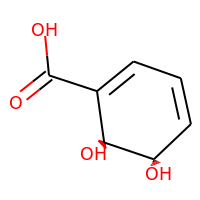
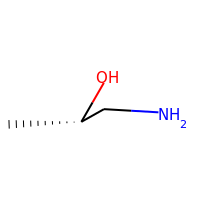
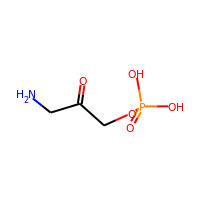
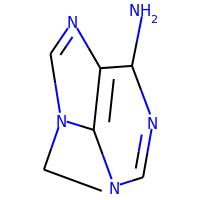
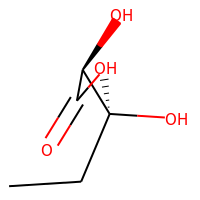

In [12]:
#まとめたSDFをpandasにロード
df_PCCDB=PandasTools.LoadSDF(WriFP)
da.descDf(df_PCCDB)

,HBA,HBD,ID,ROMol,TPSA,cid,dipole,excitation_energy_1,excitation_energy_2,excitation_energy_3,...,lowdin_charges,lumo_energy,melting_point,molecular_refractivity,mulliken_charges,open_babel_can_smiles,oscillator_strength_1,oscillator_strength_2,oscillator_strength_3,oscillator_strength_4
0,4,3,PCCDB-ID: 3,,77.76,3,4.4,3.854,4.276,4.356,...,19\n1 -0.177586\n2 -0.130328\n3 -0.157261\n4 -0.072111\n5 -0.018634\n6 -0.014572\n7 0.195218\n8 -0.447473\n9 -0.449084\n10 -0.368315\n11 -0.262187\n12 0.166273\n13 0.176094\n14 0.167126\n15 0.164229\n16 0.176665\n17 0.345174\n18 0.344452\n19 0.362319,-2.201,132.75,36.8,19\n1 -0.126843\n2 -0.167698\n3 -0.149307\n4 0.029338\n5 0.071841\n6 0.047905\n7 0.551868\n8 -0.609223\n9 -0.610471\n10 -0.58771\n11 -0.464566\n12 0.145904\n13 0.172716\n14 0.1539\n15 0.163632\n16 0.18275\n17 0.393281\n18 0.390155\n19 0.41253,O[C@H]1C=CC=C([C@@H]1O)C(=O)O,0.0299,0.0188,0.193,0.0162
1,2,2,PCCDB-ID: 4,,46.25,4,2.47,5.596,6.262,6.46,...,14\n1 -0.461103\n2 -0.221347\n3 -0.003749\n4 -0.562056\n5 -0.466274\n6 0.157431\n7 0.143024\n8 0.159247\n9 0.108165\n10 0.145349\n11 0.151923\n12 0.259173\n13 0.253554\n14 0.336663,1.848,48.3,20.4,14\n1 -0.464472\n2 -0.129213\n3 0.131922\n4 -0.720924\n5 -0.622405\n6 0.148951\n7 0.131458\n8 0.161801\n9 0.092821\n10 0.136684\n11 0.153963\n12 0.30602\n13 0.292737\n14 0.380656,C[C@@H](CN)O,0.0039,0.0227,0.0011,0.0442
2,6,3,PCCDB-ID: 5,,119.66,5,3.46,4.245,5.121,5.732,...,18\n1 -0.237996\n2 -0.161494\n3 0.15065\n4 -0.526728\n5 -0.238137\n6 -0.559023\n7 -0.548562\n8 -0.598981\n9 -0.388809\n10 1.118539\n11 0.17026\n12 0.16897\n13 0.186922\n14 0.17241\n15 0.26471\n16 0.262639\n17 0.376887\n18 0.387741,-1.461,130.8,31.51,18\n1 -0.245504\n2 -0.126751\n3 0.439452\n4 -0.683042\n5 -0.462317\n6 -0.642377\n7 -0.613135\n8 -0.563443\n9 -0.519854\n10 1.130502\n11 0.183548\n12 0.180534\n13 0.207595\n14 0.182627\n15 0.314094\n16 0.311711\n17 0.462776\n18 0.443585,NCC(=O)COP(=O)(O)O,0.0001,0.0001,0.0018,0.0098
3,5,1,PCCDB-ID: 7,,69.62,7,2.48,4.949,4.986,5.215,...,21\n1 -0.452989\n2 -0.189017\n3 -0.037176\n4 -0.067197\n5 -0.062936\n6 0.120071\n7 0.056413\n8 -0.441993\n9 -0.223617\n10 -0.211215\n11 -0.195717\n12 -0.025588\n13 0.15928\n14 0.171175\n15 0.155754\n16 0.170216\n17 0.157099\n18 0.157503\n19 0.16897\n20 0.298621\n21 0.292342,-0.4,146.83,45.8,21\n1 -0.448121\n2 -0.151743\n3 0.160899\n4 0.213715\n5 0.193071\n6 0.483482\n7 0.513626\n8 -0.77493\n9 -0.509117\n10 -0.510597\n11 -0.527562\n12 -0.474722\n13 0.153341\n14 0.186059\n15 0.154996\n16 0.184461\n17 0.156449\n18 0.142533\n19 0.159211\n20 0.352578\n21 0.34237,CCn1cnc2c1[N]C=N[C]2N,0.1801,0.0314,0.0366,0.0102
4,4,3,PCCDB-ID: 8,,77.76,8,4.79,5.491,6.234,6.82,...,22\n1 -0.451101\n2 -0.460142\n3 -0.287902\n4 -0.047704\n5 0.173846\n6 0.112935\n7 -0.458552\n8 -0.252341\n9 -0.342015\n10 -0.469119\n11 0.157353\n12 0.143\n13 0.162767\n14 0.160556\n15 0.15057\n16 0.161126\n17 0.137102\n18 0.170281\n19 0.17202\n20 0.351893\n21 0.362958\n22 0.352469,0.31,98.85,35.09,22\n1 -0.462523\n2 -0.466719\n3 -0.259074\n4 0.037358\n5 0.599271\n6 0.260735\n7 -0.664591\n8 -0.462421\n9 -0.573788\n10 -0.665715\n11 0.153017\n12 0.136828\n13 0.173172\n14 0.160622\n15 0.139013\n16 0.164468\n17 0.113952\n18 0.183155\n19 0.180661\n20 0.422878\n21 0.426701\n22 0.403001,CC[C@@]([C@@H](C(=O)O)O)(O)C,0.0006,0.0037,0.0154,0.0119
5,4,4,PCCDB-ID: 12,,80.92,12,3.64,4.233,4.569,4.77,...,16\n1 -0.283783\n2 -0.256383\n3 0.108187\n4 0.073206\n5 0.094585\n6 0.035349\n7 -0.384865\n8 -0.398756\n9 -0.365086\n10 -0.379023\n11 0.14979\n12 0.164441\n13 0.355335\n14 0.365007\n15 0.360258\n16 0.361737,0.503,166.21,34.53,16\n1 -0.282653\n2 -0.252438\n3 0.359775\n4 0.313258\n5 0.320581\n6 0.272677\n7 -0.654111\n8 -0.680302\n9 -0.633286\n10 -0.650798\n11 0.105139\n12 0.12658\n13 0.406061\n14 0.416583\n15 0.409539\n16 0.423393,Oc1cc(O)c(c(c1)O)O,0.0017,0.0,0.0531,0.0004
6,5,2,PCCDB-ID: 17,,86.96,17,3.78,3.738,3.977,4.289,...,19\n1 -0.108858\n2 -0.194792\n3 -0.2774\n4 0.038684\n5 -0.105831\n6 0.188825\
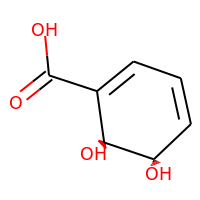
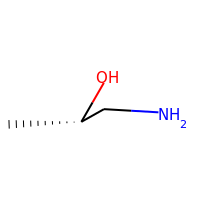
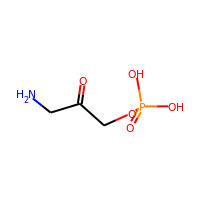
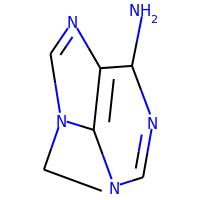
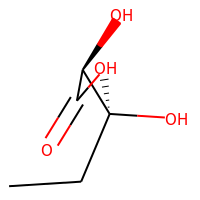
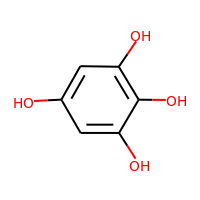
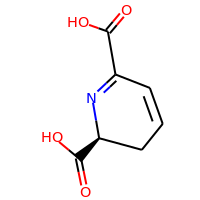
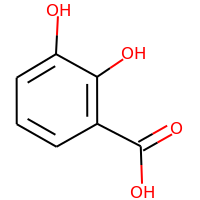
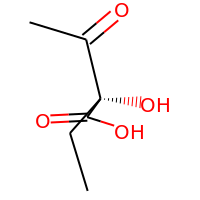
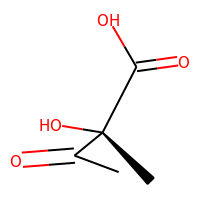
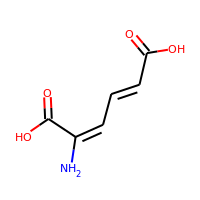
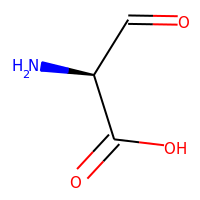
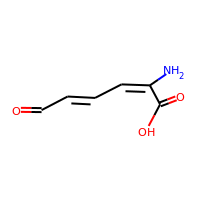
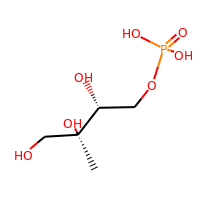
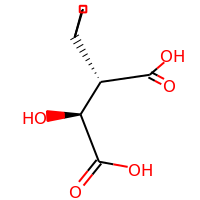
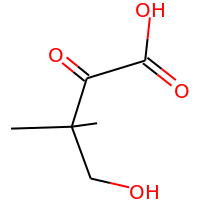
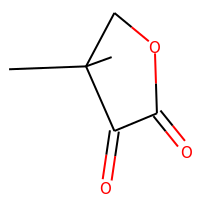
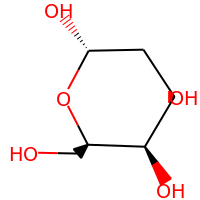
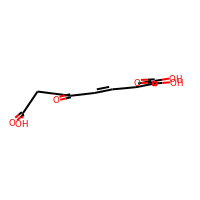
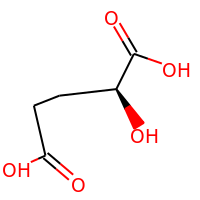
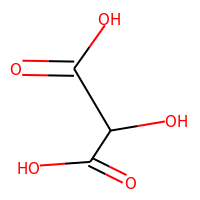
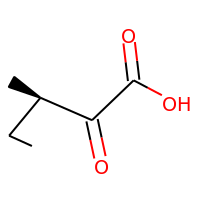
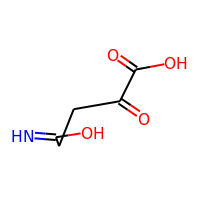
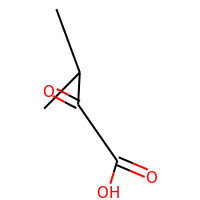
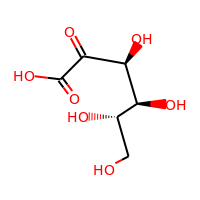
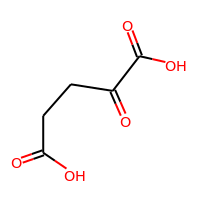
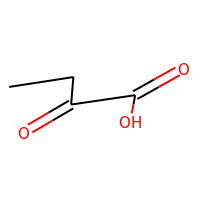
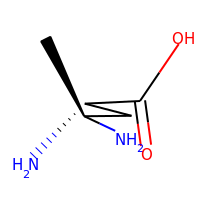
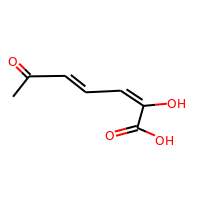
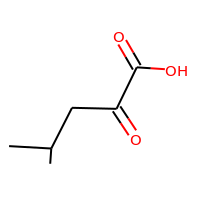
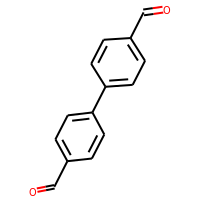
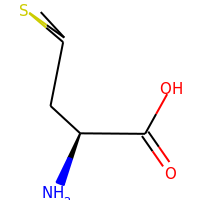
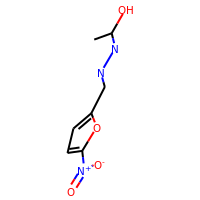
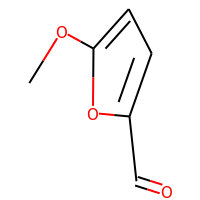
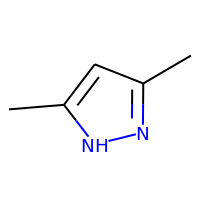
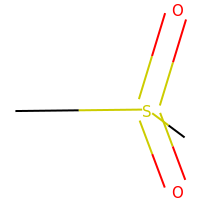
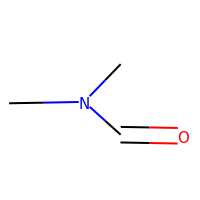
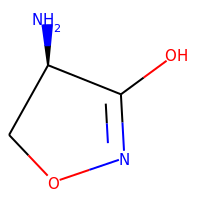
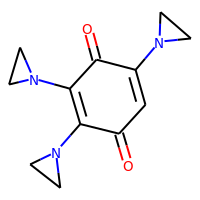
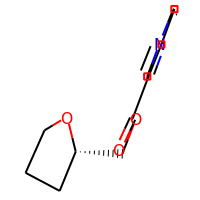
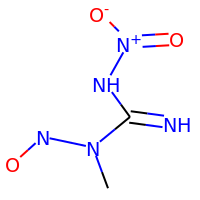
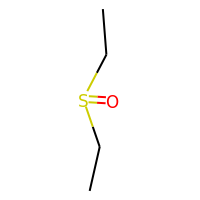
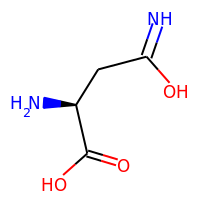
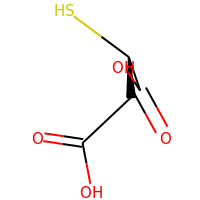
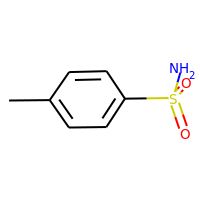
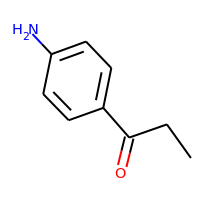
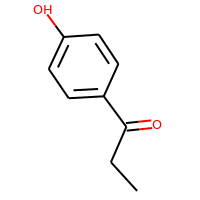
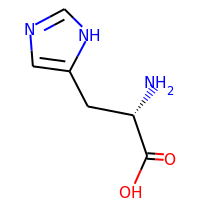
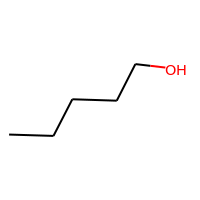
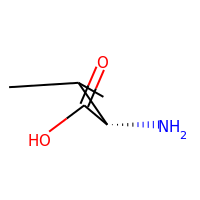
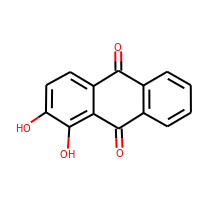
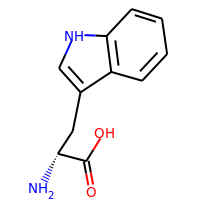
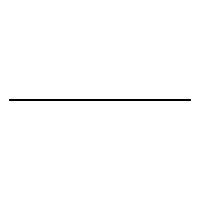
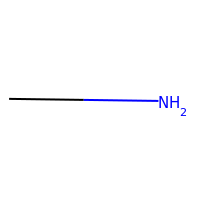
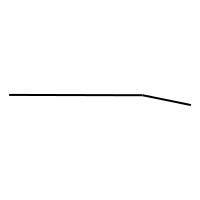
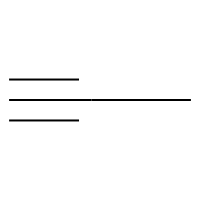
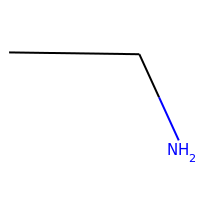
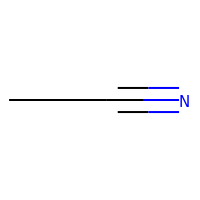
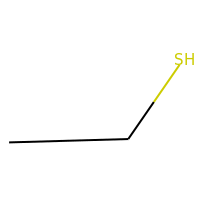
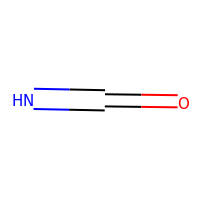

In [13]:
df_PCCDB

In [7]:
print(Chem.MolToMolBlock(L_mol[0]))

PCCDB-ID:  3
     RDKit          3D

 19 19  0  0  1  0  0  0  0  0999 V2000
    1.0657    0.8358    0.2463 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.2923    1.3182    0.0023 C   0  0  0  0  0  0  0  0  0  0  0  0
    1.3550   -0.4791    0.2035 C   0  0  0  0  0  0  0  0  0  0  0  0
   -1.3396    0.4661   -0.0834 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.2902   -1.4890   -0.1535 C   0  0  1  0  0  0  0  0  0  0  0  0
   -1.1337   -1.0073    0.1976 C   0  0  1  0  0  0  0  0  0  0  0  0
   -2.7176    0.9187   -0.3757 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.4209   -1.8479   -1.5346 O   0  0  0  0  0  0  0  0  0  0  0  0
   -1.4342   -1.2858    1.5715 O   0  0  0  0  0  0  0  0  0  0  0  0
   -2.8496    2.2737   -0.3949 O   0  0  0  0  0  0  0  0  0  0  0  0
   -3.6545    0.1776   -0.5972 O   0  0  0  0  0  0  0  0  0  0  0  0
    1.8445    1.5729    0.4255 H   0  0  0  0  0  0  0  0  0  0  0  0
   -0.4485    2.3855   -0.1219 H   0  0  0  0  0  0  0  0  0  0  0  0
    2.3749   

In [13]:
with open('./SDF/PCCID_00000003.sdf','rb') as f:
    suppl=Chem.ForwardSDMolSupplier(f)
    for el in suppl:
        if el is not None:
            print(el)